In [3]:
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler
from finetune import OUTPUT_BASEDIR
from PIL import Image

In [2]:
pipe: StableDiffusionPipeline = StableDiffusionPipeline.from_pretrained(
    f'{OUTPUT_BASEDIR}/test_run',
    torch_dtype=torch.float16,
).to("cuda")

Loading pipeline components...:  29%|██▊       | 2/7 [00:01<00:02,  1.70it/s]/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
Loading pipeline components...: 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]


In [ ]:
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config, rescale_betas_zero_snr=True, )

  1%|          | 1/100 [00:00<00:10,  9.86it/s]

100%|██████████| 100/100 [00:05<00:00, 17.37it/s]


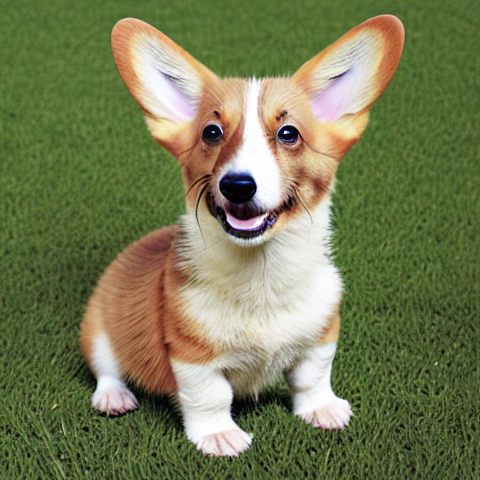

In [22]:
image: list[Image.Image] = pipe(
    prompt='ccorgi dog on a grassy field',
    negative_prompt="Oversaturated, blurry, low quality",
    height=480, width=480,
    guidance_scale=10,
    num_inference_steps=100,
).images
image[0].show()